# Load libraries and data

In [1]:
import pandas as pd #for data frames
import numpy as np 
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
from sklearn import preprocessing #for preprocessing (scaling) data
from sklearn.model_selection import train_test_split #for cross-validation
from sklearn.neighbors import KNeighborsClassifier #for KNN model
from sklearn.tree import DecisionTreeClassifier #for Decision Tree model
from sklearn import svm #for SVM model
from sklearn.linear_model import LogisticRegression #for Logistic Regression model
from sklearn.metrics import classification_report, confusion_matrix #for analysis of model
import sklearn.tree as tree #for ploting tree from decision tree model
import itertools

Load palmers penguins data set (from a csv file pulled from GitHub user Slopp). Summary of data fields below

Field | Description
------------- | ----
rowid | Row ID number
species  |Species of penguin (Adelie, Gentoo, Chinstrap)
island | Island where tagged? (Torgersen, Biscoe, Dream)
bill_length_mm  | Bill length (in mm)
bill_depth_mm       | Bill depth (in mm)
flipper_length_mm  | Flipper length (in mm)
body_mass_g  | Body mass (in g)
sex | Sex (male, female)
year | Year tagged (range 2007 - 2009)

In [2]:
df = pd.read_csv("E:/Data_Science_projects/penguins_classification/penguins.csv")
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Change rowid and year from int to string.

In [3]:
df = df.astype({"rowid": str,"year":str})

# Exploratory data analysis

How large is the data set? Any missing values? Look at summary statistics

In [4]:
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
df.shape

(344, 9)

In [6]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

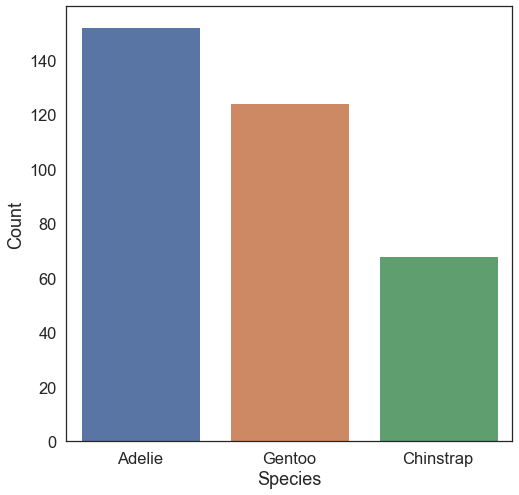

In [7]:
sns.set(style='white',font_scale=1.5)

plt.figure(figsize=(8, 8))

chart = sns.countplot(x='species',data=df)

chart.set(xlabel='Species', ylabel='Count')
plt.show()

In [8]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

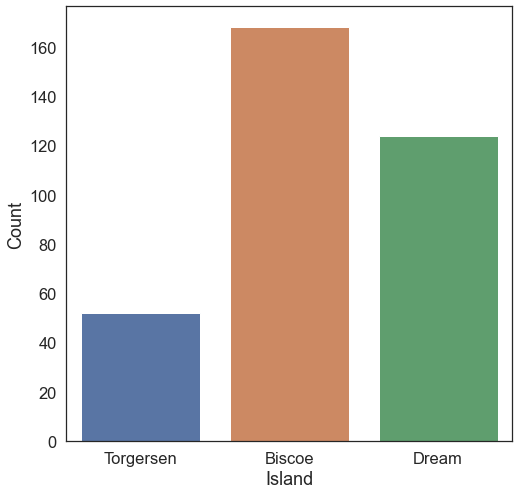

In [9]:
sns.set(style='white',font_scale=1.5)

plt.figure(figsize=(8, 8))

chart = sns.countplot(x='island',data=df)

chart.set(xlabel='Island', ylabel='Count')
plt.show()

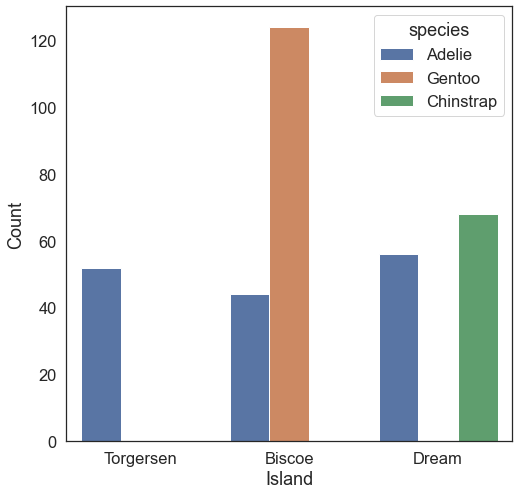

In [10]:
plt.figure(figsize=(8, 8))

chart = sns.countplot(x="island", hue="species", data=df)

chart.set(xlabel='Island', ylabel='Count')
plt.show()

In [11]:
df['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

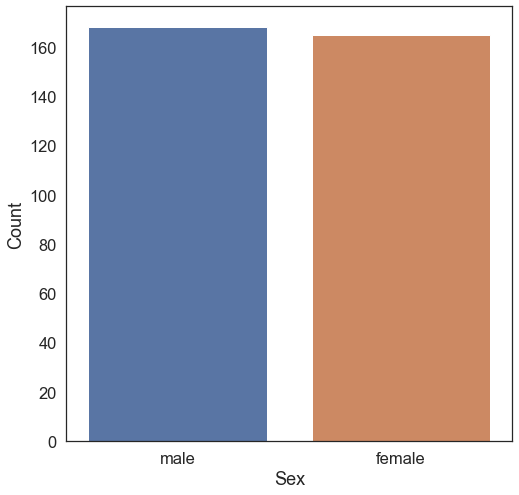

In [12]:
sns.set(style='white',font_scale=1.5)

plt.figure(figsize=(8, 8))

chart = sns.countplot(x='sex',data=df)

chart.set(xlabel='Sex', ylabel='Count')
plt.show()

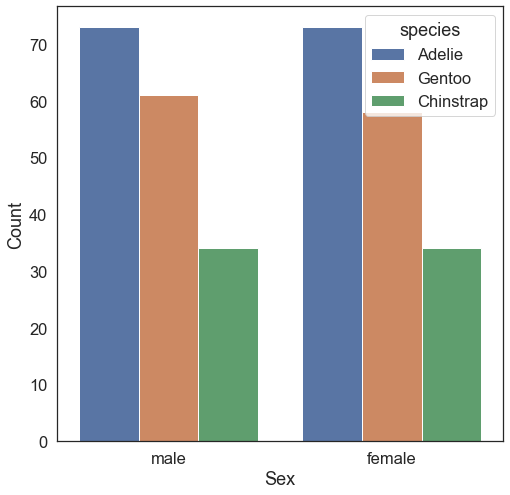

In [13]:
plt.figure(figsize=(8, 8))

chart = sns.countplot(x="sex", hue="species", data=df)

chart.set(xlabel='Sex', ylabel='Count')
plt.show()

In [14]:
df['year'].value_counts()

2009    120
2008    114
2007    110
Name: year, dtype: int64

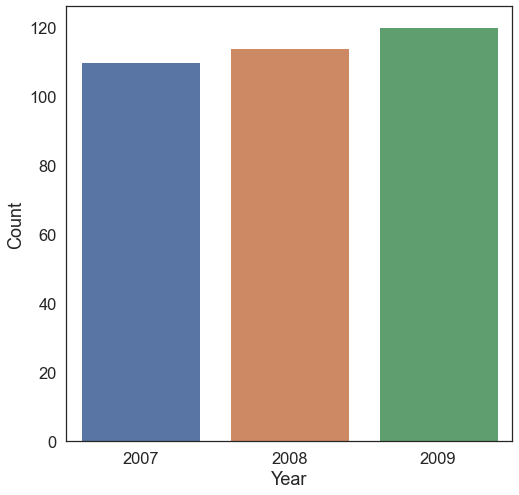

In [15]:
sns.set(style='white',font_scale=1.5)

plt.figure(figsize=(8, 8))

chart = sns.countplot(x='year',data=df)

chart.set(xlabel='Year', ylabel='Count')
plt.show()

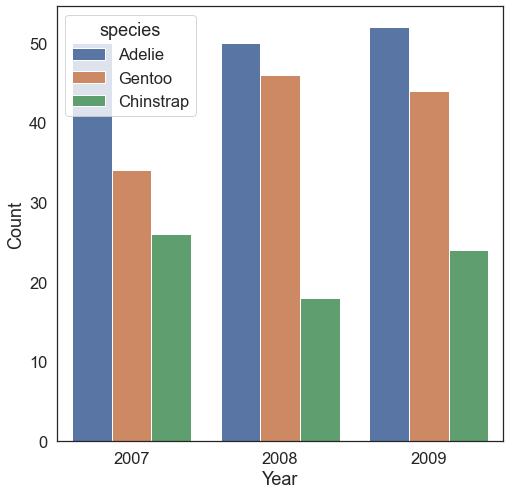

In [16]:
plt.figure(figsize=(8, 8))

chart = sns.countplot(x="year", hue="species", data=df)

chart.set(xlabel='Year', ylabel='Count')
plt.show()

<Figure size 576x576 with 0 Axes>

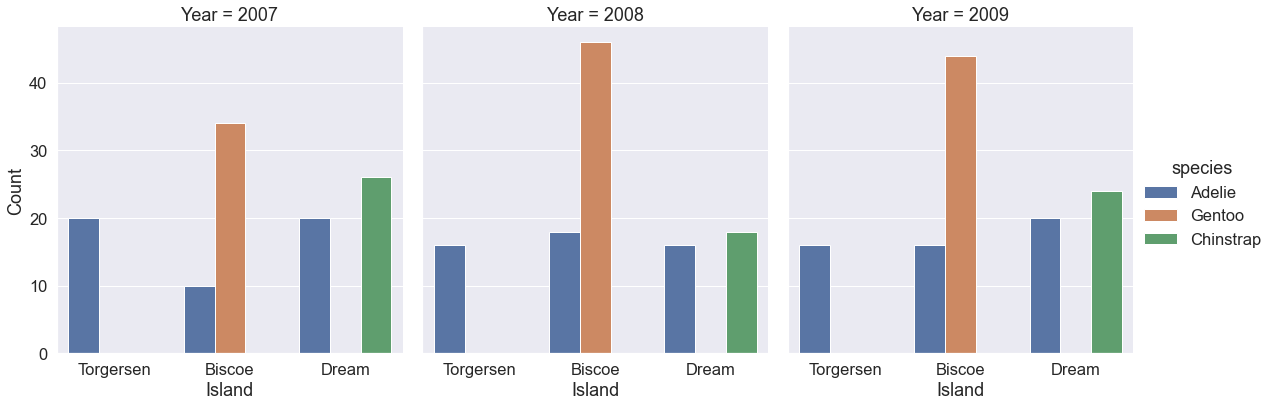

In [17]:
sns.set(font_scale=1.5)

plt.figure(figsize=(8,8))

chart = sns.catplot(x="island", hue="species", col="year",
                data=df, kind="count",
                height=6, aspect=.9)

chart.set_xlabels('Island')
chart.set_ylabels('Count')
chart.set_titles(col_template='Year = {col_name}')

plt.show()

In [18]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
df[df.isnull().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


Drop rows with missing sex information since it is a relatively small portion of the data set (11 of 344). (Alternative - determine a classification scheme for gender based on other characteristics to fill in the missing values).

In [20]:
df=df.dropna()

Plot histogram and boxplot for each of the four variables to see distribution

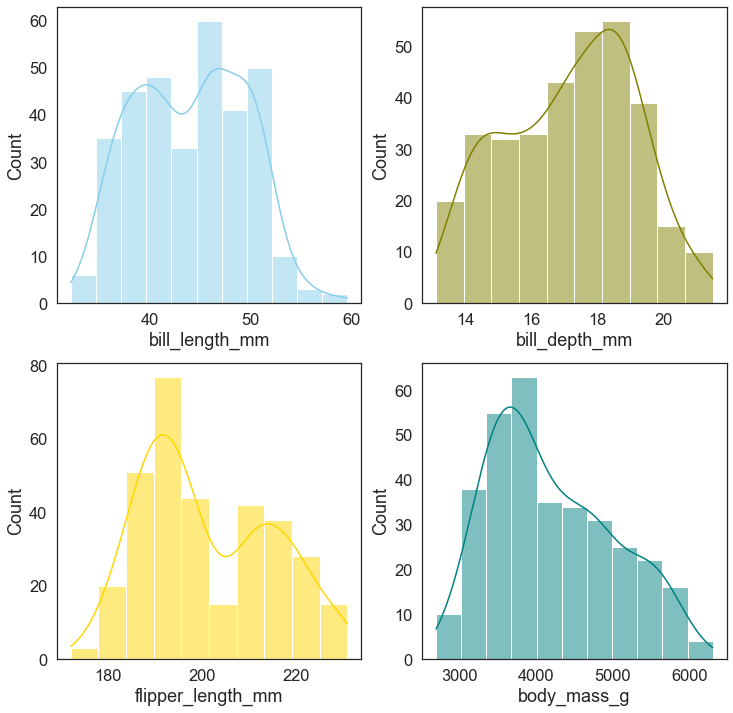

In [21]:
sns.set(style='white',font_scale=1.5)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df, x="bill_length_mm", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="bill_depth_mm", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="flipper_length_mm", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="body_mass_g", kde=True, color="teal", ax=axs[1, 1])

plt.show()

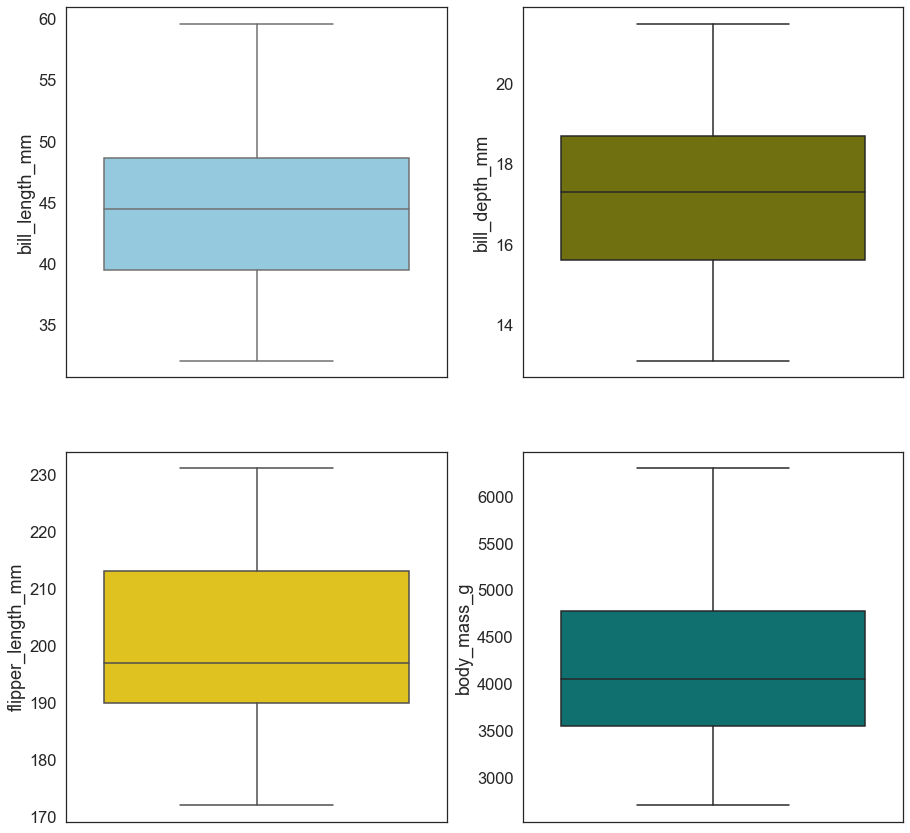

In [54]:
sns.set(style='white',font_scale=1.5)
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(data=df, y="bill_length_mm", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, y="bill_depth_mm", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, y="flipper_length_mm", color="gold", ax=axs[1, 0])
sns.boxplot(data=df, y="body_mass_g", color="teal", ax=axs[1, 1])

plt.show()

Plot side-by-side boxplots for each of the four features comparing between the values of the target variable (species)

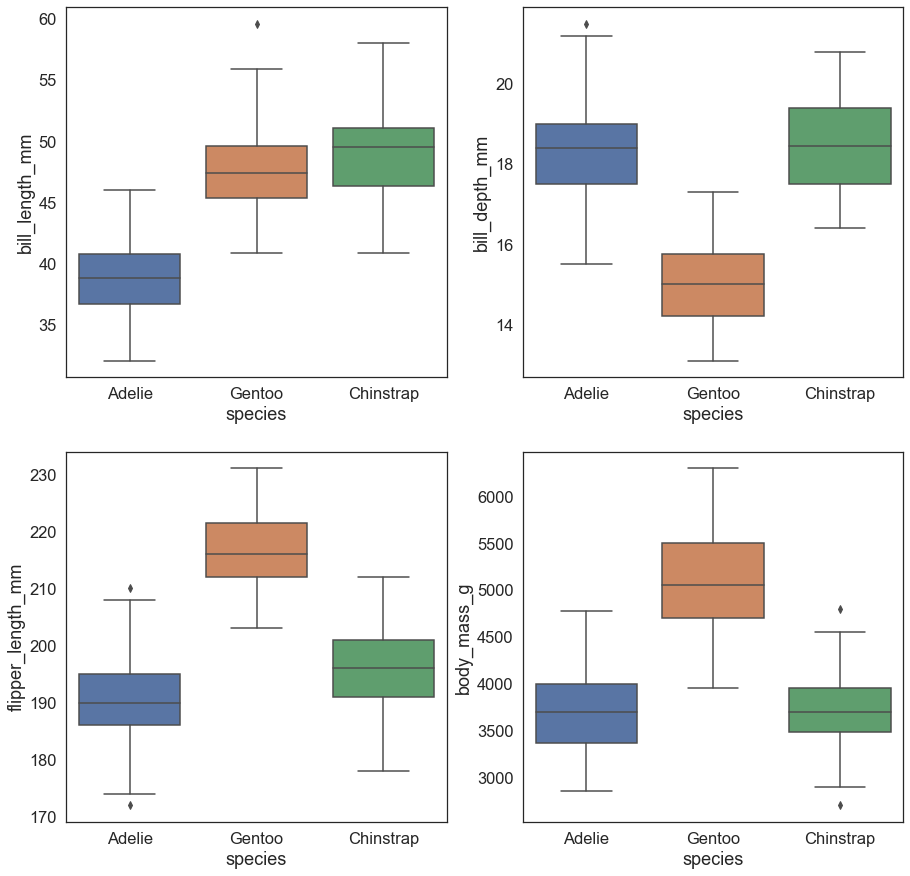

In [22]:
sns.set(style='white',font_scale=1.5)

fig, axs = plt.subplots(2, 2, figsize=(15,15))

sns.boxplot(x=df["species"], y=df["bill_length_mm"], ax=axs[0,0])
sns.boxplot(x=df["species"], y=df["bill_depth_mm"], ax=axs[0,1])
sns.boxplot(x=df["species"], y=df["flipper_length_mm"], ax=axs[1,0])
sns.boxplot(x=df["species"], y=df["body_mass_g"], ax=axs[1,1])

plt.show()

Plot the four features grouped by sex to see if there is a large impact based on sex.

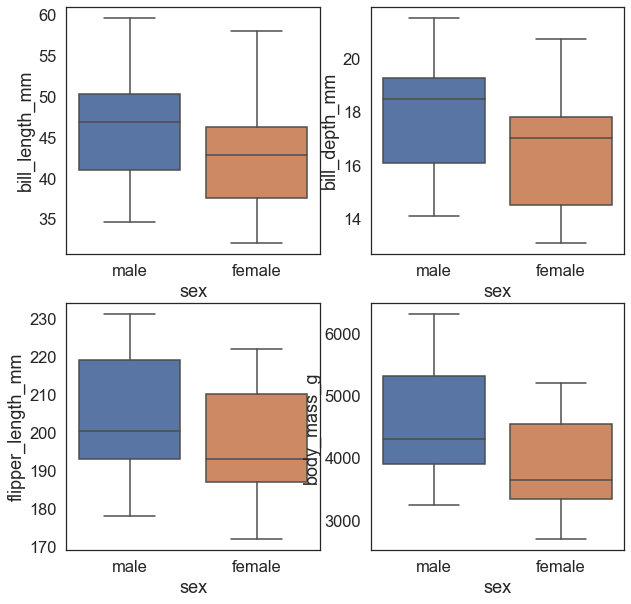

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(x=df["sex"], y=df["bill_length_mm"], ax=axs[0,0])
sns.boxplot(x=df["sex"], y=df["bill_depth_mm"], ax=axs[0,1])
sns.boxplot(x=df["sex"], y=df["flipper_length_mm"], ax=axs[1,0])
sns.boxplot(x=df["sex"], y=df["body_mass_g"], ax=axs[1,1])

plt.show()

The differences in bill length, bill depth, flipper length and body mass for males and females seems to be small overall, but what if we separate along species lines as well?

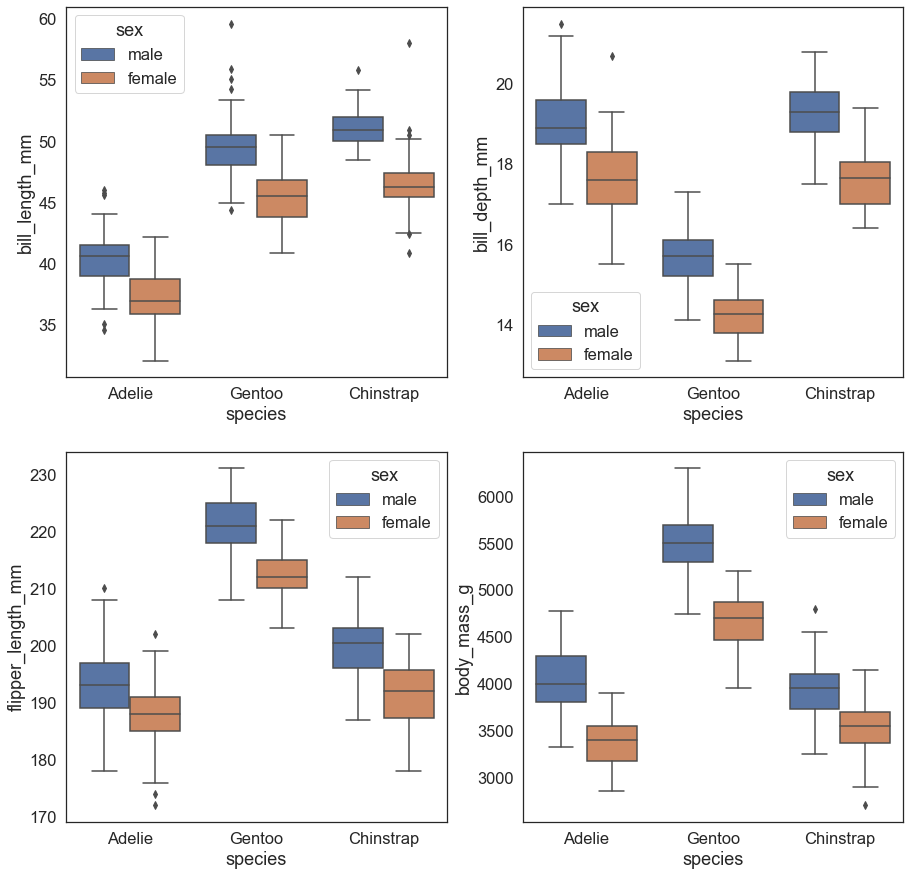

In [24]:
sns.set(style='white',font_scale=1.5)

fig, axs = plt.subplots(2, 2, figsize=(15,15))

sns.boxplot(x=df["species"], y=df["bill_length_mm"], hue=df["sex"], ax=axs[0,0])
sns.boxplot(x=df["species"], y=df["bill_depth_mm"], hue=df["sex"], ax=axs[0,1])
sns.boxplot(x=df["species"], y=df["flipper_length_mm"], hue=df["sex"], ax=axs[1,0])
sns.boxplot(x=df["species"], y=df["body_mass_g"], hue=df["sex"], ax=axs[1,1])

plt.show()

What about differences in the measured quantities based on island?

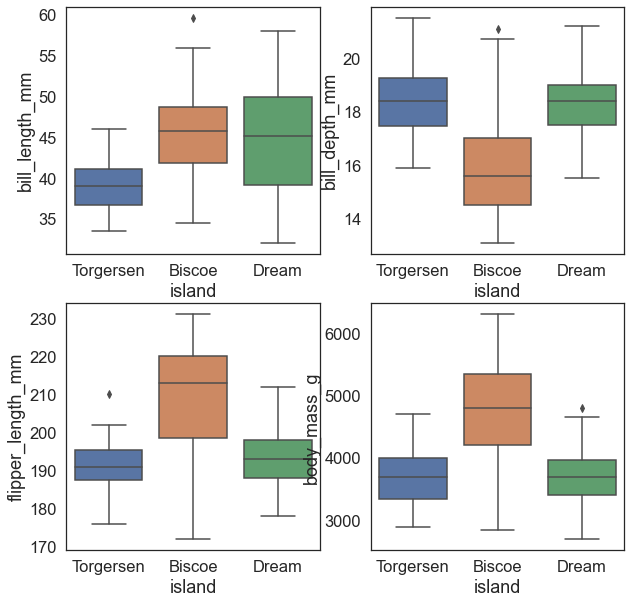

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(x=df["island"], y=df["bill_length_mm"], ax=axs[0,0])
sns.boxplot(x=df["island"], y=df["bill_depth_mm"], ax=axs[0,1])
sns.boxplot(x=df["island"], y=df["flipper_length_mm"], ax=axs[1,0])
sns.boxplot(x=df["island"], y=df["body_mass_g"], ax=axs[1,1])

plt.show()

Again, there seems to be no difference in measurement based on the island. Let's look at both species and island relationship to the measurement.

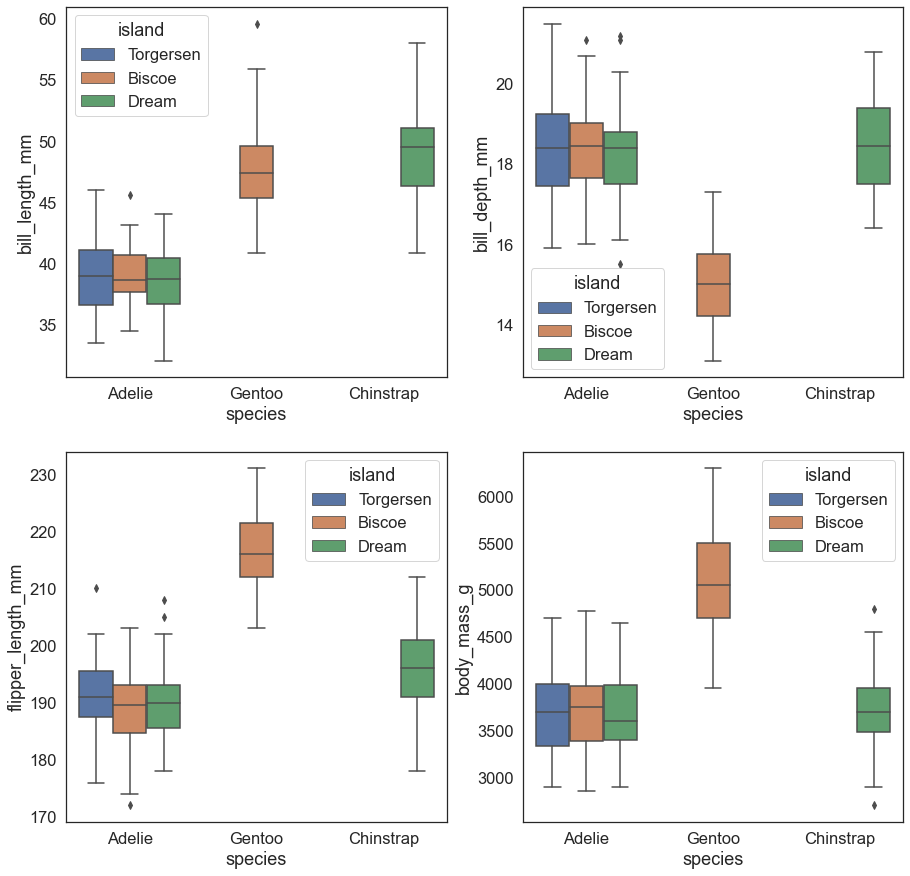

In [26]:
sns.set(style='white',font_scale=1.5)
fig, axs = plt.subplots(2, 2, figsize=(15,15))

sns.boxplot(x=df["species"], y=df["bill_length_mm"], hue=df["island"], ax=axs[0,0])
sns.boxplot(x=df["species"], y=df["bill_depth_mm"], hue=df["island"], ax=axs[0,1])
sns.boxplot(x=df["species"], y=df["flipper_length_mm"], hue=df["island"], ax=axs[1,0])
sns.boxplot(x=df["species"], y=df["body_mass_g"], hue=df["island"], ax=axs[1,1])

plt.show()

AHA! Looks like Gentoo penguins are only on Biscoe and Chistrap penguins are only on Dream. But we find Adelie penguins on all three islands. So if we know the island is Torgersen, it should be an Adelie penguin. If the island is Biscoe, it will be either Adelie or Gentoo. If the island is Dream, it will be either Adelie or Chinstrap. (This makes me think decision trees might be a good way to go.....)

Differences in measurements based on year data collected?

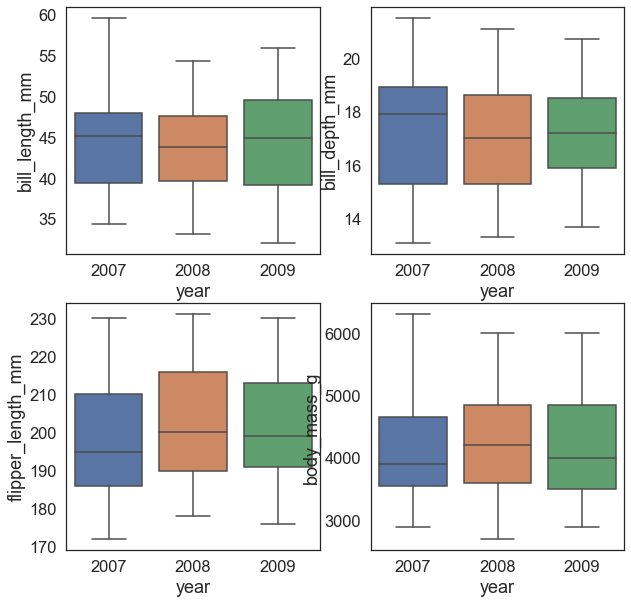

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(x=df["year"], y=df["bill_length_mm"], ax=axs[0,0])
sns.boxplot(x=df["year"], y=df["bill_depth_mm"], ax=axs[0,1])
sns.boxplot(x=df["year"], y=df["flipper_length_mm"], ax=axs[1,0])
sns.boxplot(x=df["year"], y=df["body_mass_g"], ax=axs[1,1])

plt.show()

What if we separate out both year and species?

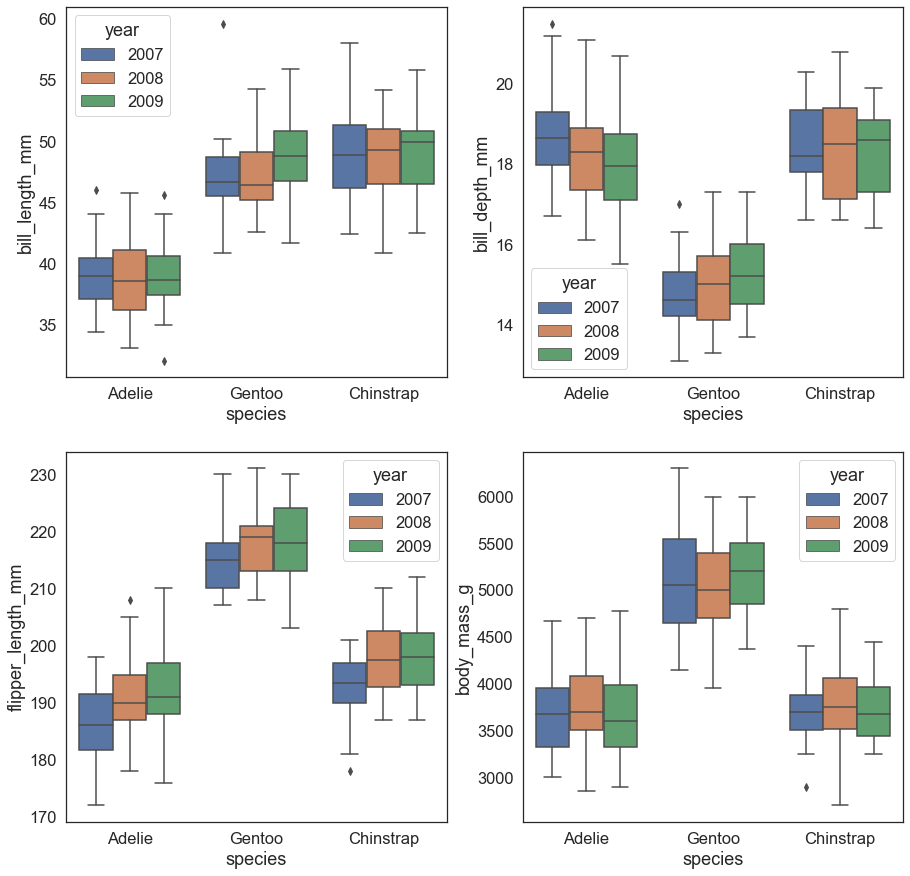

In [28]:
sns.set(style='white',font_scale=1.5)
fig, axs = plt.subplots(2, 2, figsize=(15,15))

sns.boxplot(x=df["species"], y=df["bill_length_mm"], hue=df["year"], ax=axs[0,0])
sns.boxplot(x=df["species"], y=df["bill_depth_mm"], hue=df["year"], ax=axs[0,1])
sns.boxplot(x=df["species"], y=df["flipper_length_mm"], hue=df["year"], ax=axs[1,0])
sns.boxplot(x=df["species"], y=df["body_mass_g"], hue=df["year"], ax=axs[1,1])

plt.show()

The year the data were collected seems to not have an impact on the measurements, so we will not include it in our analysis.

Plot each pair of quantitative variables to see relationships

<Figure size 1080x1080 with 0 Axes>

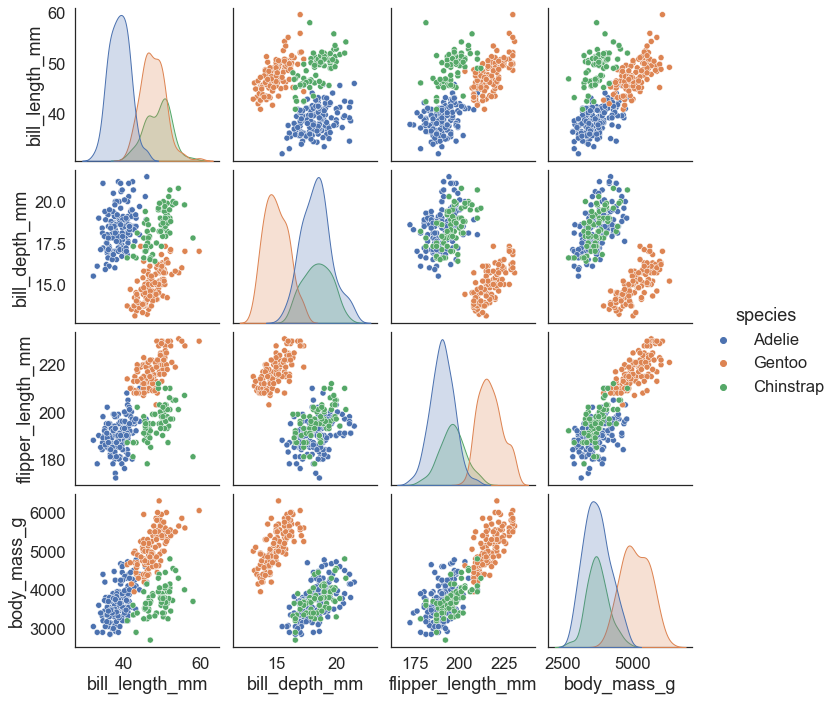

In [29]:
sns.set(style='white',font_scale=1.5)
plt.figure(figsize=(15,15))
sns.pairplot(df, kind="scatter",hue='species')
plt.show()

# Pre-processing

Convert sex data from categorical to numerical: 0=male, 1=female

In [30]:
df['sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

C:\Users\jklenarz\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Convert island data from categorical to numerical using one-hot encoding

In [31]:
Feature = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]
Feature = pd.concat([Feature,pd.get_dummies(df['island'])], axis=1)

Store independent variables in X and dependent variable in Y

In [32]:
X = Feature
Y = df['species'].values
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0,1


Split data into training and testing sets for cross-validation

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=4)

Scale data - potential here to change the scaling metric (normalization vs standardization, etc), don't need scaled data for decision tree, so save sets as is to a new variable before scaling

In [34]:
#save data as is for decision tree
X_train1 = X_train
X_test1 = X_test

#scale for KNN, SVM, logistic reg
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

# Classification: K Nearest Neighbors Model

Split training set to determine best k for the KNN model

In [35]:
X_tune_train, X_tune_test, Y_tune_train, Y_tune_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=4)

Loop to determine accuracy of KNN for several values of k

In [36]:
error = []

for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i).fit(X_tune_train,Y_tune_train)
    pred_i = knn_model.predict(X_tune_test)
    error.append(np.mean(pred_i != Y_tune_test))


Plot of error to determine best k (this is dependent on the test_size in the train/test/split)

Text(0, 0.5, 'Mean Error')

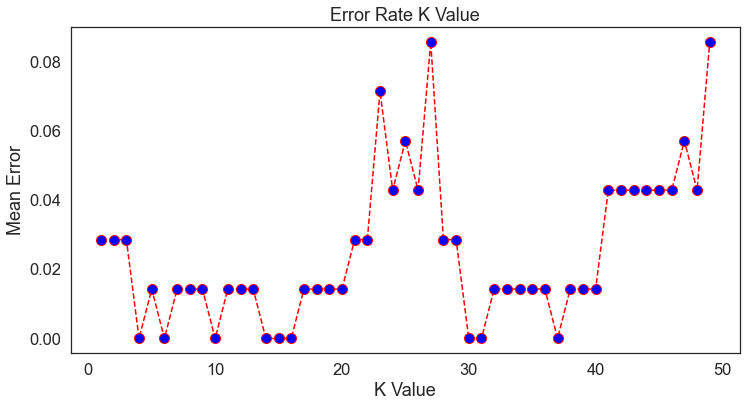

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

After repeating with different test_size parameters, I think k=4 would be a good choice. Refit the model on the entire training set with k=4.

In [38]:
knn_model = KNeighborsClassifier(n_neighbors = 4).fit(X_train,Y_train)

Check accuracy of model

In [39]:
Y_hat_knn = knn_model.predict(X_test)

Define function to create nice plot of confusion matrix

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        44
   Chinstrap       1.00      0.95      0.97        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion matrix, without normalization
[[44  0  0]
 [ 1 19  0]
 [ 0  0 36]]


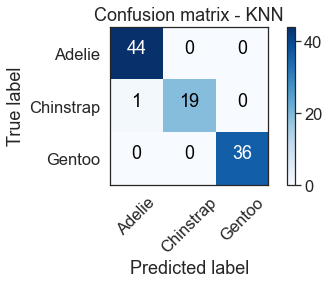

In [41]:
cnf_matrix = confusion_matrix(Y_test, Y_hat_knn)
np.set_printoptions(precision=2)

print (classification_report(Y_test, Y_hat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Adelie','Chinstrap','Gentoo'],normalize= False,  title='Confusion matrix - KNN')

# Classification: Decision tree

Fit decision tree model

In [42]:
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5).fit(X_train1,Y_train)

Check accuraccy of model

In [43]:
Y_hat_dt = dt_model.predict(X_test1)

              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97        44
   Chinstrap       0.95      0.95      0.95        20
      Gentoo       1.00      0.97      0.99        36

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion matrix, without normalization
[[43  1  0]
 [ 1 19  0]
 [ 1  0 35]]


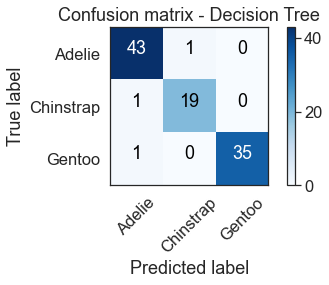

In [44]:
cnf_matrix = confusion_matrix(Y_test, Y_hat_dt)
np.set_printoptions(precision=2)

print (classification_report(Y_test, Y_hat_dt))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Adelie','Chinstrap','Gentoo'],normalize= False,  title='Confusion matrix - Decision Tree')

Print the resulting decision tree -- note X[0] is the bill length, X[1] is the bill depth, X[2] is the flipper length, X[3] is the body mass, X[4] is the sex identifier, X[5] is the identifier for Biscoe island, X[6] is the identifier for Dream island, and X[7] is the identifier for Torgersen island.

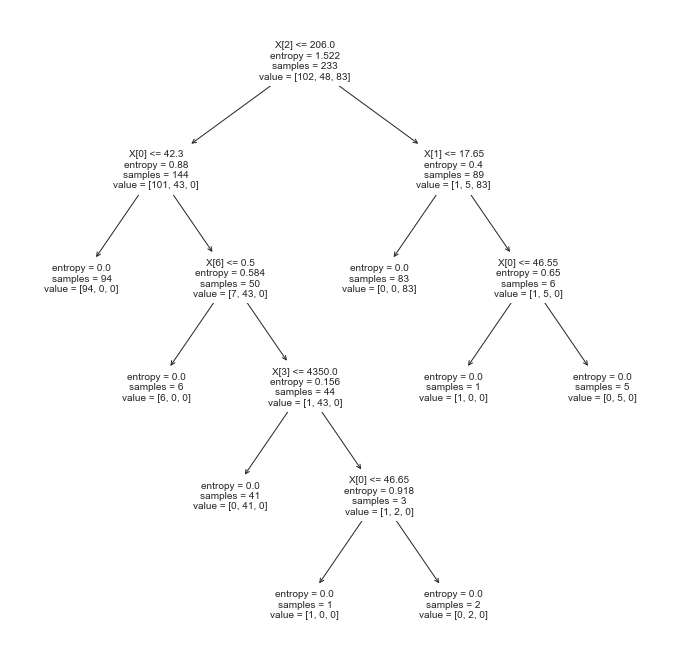

In [45]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(dt_model, fontsize=10)
plt.show()

So the first line asks, "Is the flipper length less than or equal to 206 mm?" If the flipper length is less than or equal to 206 mm, take the left branch and ask the question "is the bill length less than or equal to 42.3 mm?" If the flipper length is not less than or equal to 206 mm, take the right branch and ask the question "is the bill depth less than or equal to 17.65 mm?" Continue until we reach a box with entropy = 0. 

# Classification: Support Vector Machine (SVM)

Fit SVM model (both radial basis function and linear kernels give the following results; sigmoid was awful)

In [46]:
svm_model = svm.SVC(kernel='rbf').fit(X_train, Y_train)

Y_hat_svm = svm_model.predict(X_test)

Analyze SVM model

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        44
   Chinstrap       1.00      0.95      0.97        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion matrix, without normalization
[[44  0  0]
 [ 1 19  0]
 [ 0  0 36]]


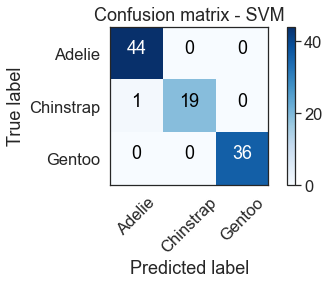

In [47]:
cnf_matrix = confusion_matrix(Y_test, Y_hat_svm)
np.set_printoptions(precision=2)

print (classification_report(Y_test, Y_hat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Adelie','Chinstrap','Gentoo'],normalize= False,  title='Confusion matrix - SVM')

# Classification: Logistic Regression

Fit logistic regression model

In [48]:
logreg_model = LogisticRegression(C=0.01).fit(X_train, Y_train)

Analysis of logistic regression model

In [49]:
Y_hat_logreg = logreg_model.predict(X_test)

              precision    recall  f1-score   support

      Adelie       0.92      1.00      0.96        44
   Chinstrap       1.00      0.80      0.89        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

Confusion matrix, without normalization
[[44  0  0]
 [ 4 16  0]
 [ 0  0 36]]


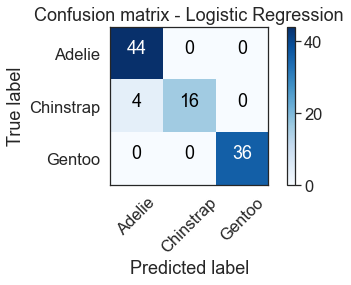

In [50]:
cnf_matrix = confusion_matrix(Y_test, Y_hat_logreg)
np.set_printoptions(precision=2)

print (classification_report(Y_test, Y_hat_logreg))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Adelie','Chinstrap','Gentoo'],normalize= False,  title='Confusion matrix - Logistic Regression')

# Comparison of Models

Compare the Precision, Recall (Sensitivity), and F1 score for the four models

| Algorithm          | Average Precision | Average Recall | Average F1 Score |
|--------------------|---------|----------|---------|
| KNN                | 0.99    | 0.99     | 0.99      |
| Decision Tree      | 0.97    | 0.97     | 0.97      |
| SVM                | 0.99    | 0.99     | 0.99      |
| LogisticRegression | 0.96    | 0.96     | 0.96    |